[*********************100%***********************]  1 of 1 completed
1 const    0.009606
x1       0.008998
dtype: float64
[*********************100%***********************]  1 of 1 completed
2 const   -0.055770
x1       0.004565
dtype: float64
[*********************100%***********************]  1 of 1 completed
3 const   -0.036056
x1       0.000975
dtype: float64
[*********************100%***********************]  1 of 1 completed
4 const   -0.080261
x1      -0.005271
dtype: float64
[*********************100%***********************]  1 of 1 completed
5 const   -0.023673
x1      -0.008294
dtype: float64
[*********************100%***********************]  1 of 1 completed
6 const   -0.021477
x1      -0.012448
dtype: float64
[*********************100%***********************]  1 of 1 completed
7 const   -0.039714
x1      -0.015105
dtype: float64
[*********************100%***********************]  1 of 1 completed
8 const    0.027387
x1      -0.018542
dtype: float64
[*********************10

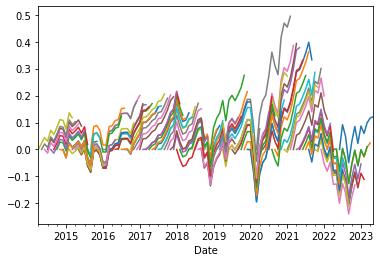

In [39]:
import statsmodels.api as sm
import numpy as np
import yfinance as yf

for n in range(1, 100):
    prices = yf.download("SPY")["Adj Close"].resample("M").last().iloc[-(n+12):-n]
    prices = prices / prices.iloc[0] - 1
    prices.plot()
    x = sm.add_constant(np.arange(len(prices)))  # Create an array of indices corresponding to the range
    model = sm.OLS(prices, x).fit()
    print(n, model.params)


Strategy init finished.
Strategy init finished.
Strategy init finished.


<AxesSubplot:>

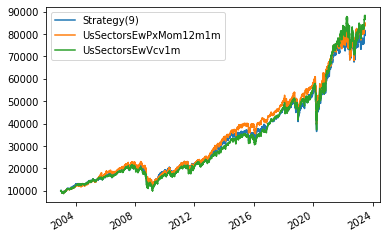

In [3]:
from src.core.strategies import MultiStrategy

multi = MultiStrategy().load_files()

multi.performance.plot()

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a sample DataFrame with multiple stock prices
df = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=5, freq='D'),
    'Price_Stock1': [100, 110, 120, 130, 140],
    'Price_Stock2': [80, 85, 90, 95, 100],
    'Price_Stock3': [70, 75, 80, 85, 90],
})

# Calculate the price changes for each stock
df[['Price_Change_Stock1', 'Price_Change_Stock2', 'Price_Change_Stock3']] = df.iloc[:, 1:4]



# Define the dependent variables (stock price changes) and the independent variable (index price changes)
y = df[['Price_Change_Stock1', 'Price_Change_Stock2', 'Price_Change_Stock3']]
X = sm.add_constant(np.ones(len(df)))

# Perform the multi-variable regression
model = sm.OLS(y, X)
results = model.fit()

# Extract the beta coefficients
beta_coefficients = results.params[1:]  # Exclude the constant term

# Print the beta coefficients
print("Beta coefficients:")
print(beta_coefficients)


Beta coefficients:
Empty DataFrame
Columns: [0, 1, 2]
Index: []


In [15]:
from src.backend import data
from src.core import metrics
import pandas as pd

std = data.get_prices("SPY").pct_change().ewm(21).std()
fwd = data.get_prices("SPY").pct_change(21).shift(-21)
dd = pd.concat([std, fwd], axis=1).dropna().apply(metrics.to_standard_scaler, axis=0)

<AxesSubplot:xlabel='Date'>

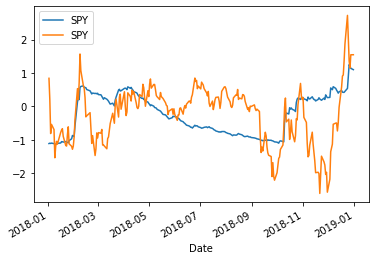

In [19]:
dd.loc["2018"].plot()

In [ ]:
class VolatilityState:
    
    lookback: int = 252 * 10
    
    def __init__(self) -> None:
        self.data = pd.DataFrame()
        
        

In [22]:
from src.backend import data
from scipy.stats import percentileofscore


class VixState:
    def __init__(self) -> None:
        self.data = pd.DataFrame()

    def fit(self):
        self.data = data.get_prices("^VIX")

    def get_state(self, date=None):
        if self.data.empty:
            self.fit()

        if date is not None:
            d = self.data.loc[:date]
        else:
            d = self.data
        d = d.iloc[-252 * 10:]
        score = percentileofscore(d.iloc[:, 0].values, d.iloc[-1, 0]) / 100
        score = (d.iloc[-1] - d.mean()) / d.std()
        score = score.iloc[0]
        if score >= 0.8 or score <= -0.8:
            return "extreme"
        return "med"


fwd = data.get_price("TLT").resample("M").last().pct_change(1).shift(-1)


import pandas as pd

norm = {}
extr = {}

for date in pd.date_range("2007-1-1", "2023-7-1", freq="M"):
    state = VixState().get_state(date)
    if state == "extreme":
        extr[str(date)]=(fwd.loc[date])
    else:
        norm[str(date)]=(fwd.loc[date])
        
print(pd.Series(extr).mean())
print(pd.Series(norm).mean())

0.002206561620298257
0.004905422644480659


In [1]:
from src import factors

0.0021157049630170003

<AxesSubplot:>

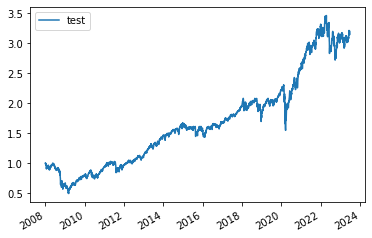

In [3]:
test.performance_alpha.plot()

In [1]:
from src.core.strategies.multi import MultiStrategy
from src import core

multis = MultiStrategy().add_strategy(
    inception="2008-1-1", 
    universe=core.universes.UnitedStatesSectors(),
    benchmark=core.benchmarks.UnitedStatesSectorsEW(),
    factor = (core.factors.PriceMomentum1M(), core.factors.PriceMomentum12M()),
)
stra = multis["Strategy(1)"]
stra.get_signature()

UnitedStatesSectors.get_prices called.


{'universe': 'UnitedStatesSectors',
 'benchmark': 'UnitedStatesSectorsEW',
 'optimizer': 'EqualWeight',
 'min_window': 2,
 'inception': '2008-1-1',
 'frequency': 'M',
 'commission': 10,
 'allow_fractional_shares': False,
 'optimizer_constraints': {},
 'specific_constraints': [],
 'factor': ('PriceMomentum1M', 'PriceMomentum12M'),
 'book': {'date': '2023-07-01 00:00:00',
  'value': 31582.445937166212,
  'cash': -2.033921232225879,
  'shares': {'XLC': 87.0,
   'XLY': 31.0,
   'XLP': 31.0,
   'XLE': 3.0,
   'XLF': 51.0,
   'XLV': 17.0,
   'XLI': 35.0,
   'XLB': 6.0,
   'XLRE': 16.0,
   'XLK': 51.0,
   'XLU': 12.0},
  'capitals': {'XLC': 5605.410026550293,
   'XLY': 5198.079772949219,
   'XLP': 2279.429962158203,
   'XLE': 241.95000457763672,
   'XLF': 1704.419906616211,
   'XLV': 2233.4600830078125,
   'XLI': 3724.350128173828,
   'XLB': 492.59999084472656,
   'XLRE': 600.0,
   'XLK': 8728.13996887207,
   'XLU': 776.6400146484375},
  'allocations': {'XLC': 0.088407,
   'XLY': 0.216759,
  

In [3]:
stra.save("test", True)

True

Book init called.
Book init called.
Strategy init finished.


Strategy simulate start.


<AxesSubplot:>

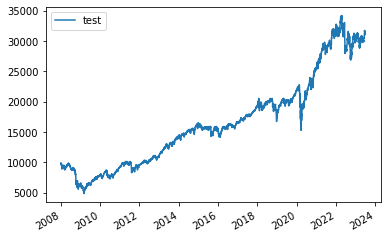

In [5]:
multis = MultiStrategy().load_files()
multis.performance.plot()

In [ ]:
multis.performance_alpha.plot()

In [ ]:
from src.core.factors import MultiFactors
from src.core import factors

sa = MultiFactors("PriceMomentum1M", "PriceMomentum18M")



In [ ]:
sa.get_factor_by_date(tickers="SPY, AGG, TLT, GSG, IEF, ACWI, IWV", date="2023-1-3")


In [ ]:

import logging
logger = logging.getLogger("test")
from src.core.strategies.multi import MultiStrategy

logger.warning("import finished")
multis = MultiStrategy().load_files()
multis.performance.plot()

In [ ]:
import pandas as pd

pd.date_range(start=pd.Timestamp("now"), freq="M")


In [ ]:
multis["Strategy(1)"].book.records.allocations

In [ ]:
import pandas as pd

# Create a sample Series
data = pd.Series([1, 2, 3, 4, 5])

# Empty the Series by assigning an empty list
data = pd.Series([])

# Verify that the Series is empty
print(data)


In [ ]:
import numpy as np
from scipy import stats


def factor_information_coefficient(
    factor_data, group_adjust=False, by_group=False, method=stats.spearmanr
):
    def src_ic(group):
        f = group["factor"]
        _ic = group[["period_1", "period_252"]].apply(lambda x: method(x, f)[0])
        return _ic

    factor_data = factor_data.copy()

    grouper = [factor_data.index.get_level_values("date")]

    # if group_adjust:
    #     factor_data = demean_forward_returns(factor_data, grouper + ['group'])
    # if by_group:
    #     grouper.append('group')

    with np.errstate(divide="ignore", invalid="ignore"):
        ic = factor_data.groupby(grouper).apply(src_ic)

    return ic


ic = factor_information_coefficient(far.clean_factor_data)

ic.plot()

In [ ]:
ic.mean()

In [ ]:
far = ja.FactorAnalyzer(
    prices=prices,
    factor=factorsdata,  # factor_data 为因子值的 pandas.DataFrame
    quantiles=10,
    periods=(1, 252),
    max_loss=0.9,
)

far

In [ ]:
far._clean_factor_data

In [ ]:
from pkg.src.core import signals, data
import pandas as pd

df = data.get_oecd_us_leading_indicator()
df.index = df.index + pd.DateOffset(months=1)
df = df.resample("M").last().dropna()

df = df.diff()
mean = df.rolling(12 * 5).mean()
std = df.rolling(12 * 5).std()
normalized = (df - mean) / std

normalized = normalized.clip(-3, 3).dropna()

import plotly.graph_objects as go


# Create the bar plot
fig = go.Figure(data=go.Bar(x=normalized.index, y=normalized["USALOLITONOSTSAM"]))

# Customize the plot layout
fig.update_layout(title="Bar Plot", xaxis_title="Categories", yaxis_title="Values")

# Display the plot
fig.show()

In [ ]:
normalized

In [ ]:
trend.loc["2015"]

In [ ]:
from pkg.src.core import data, metrics
import numpy as np
import pandas as pd

total_iter = 12 * 20 * 10
prices = data.get_prices("SPY, AGG, TLT").resample("M").last()

log_return = metrics.to_log_return(prices=prices)
expected_return = log_return.mean()
expected_riks = log_return.std()
cov = log_return.cov()
corr_cov = np.linalg.cholesky(cov)
z = np.random.normal(0, 1, size=(len(prices.columns), total_iter))

drift = np.full((total_iter, len(prices.columns)), expected_return).T
shock = np.dot(corr_cov, z)

monthly_returns = drift + shock
pd.DataFrame(
    np.transpose(monthly_returns),
    columns=prices.columns,
    # index=pd.date_range(start="2023-6-8", periods=total_iter, freq="M"),
).cumsum().plot()

In [ ]:
import pandas as pd


def to_macd(
    prices: pd.DataFrame,
    fast_window: int = 12,
    slow_window: int = 26,
    signal_window: int = 9,
) -> pd.DataFrame:
    MACD = (
        +prices.ewm(span=fast_window, min_periods=fast_window).mean()
        - prices.ewm(span=slow_window, min_periods=slow_window).mean()
    )
    signal = MACD.ewm(span=signal_window, min_periods=slow_window).mean()

    return signal


to_macd(prices).loc["2022"].plot()

In [ ]:
(
    prices.ewm(span=12, min_periods=12).mean()
    - prices.ewm(span=26, min_periods=26).mean()
).plot()

In [ ]:
yield_curve = {"T10Y2Y": "10Y-2Y", "T10Y3M": "10Y-3M"}

yield_curve_data = data.get_macro(list(yield_curve.keys())).loc["2019":]
yield_curve_data = yield_curve_data.rename(columns=yield_curve)
yield_curve_data.head().to_markdown()

In [ ]:
import plotly_express as px

px.line(yield_curve_data)

In [ ]:
my_list = [10, 20, 30, 40, 50]

# Get the index of a value in the list
value = 30

if value in my_list:
    index = my_list.index(value)
    print("Index of", value, "in the list:", index)
else:
    print(value, "is not present in the list.")

In [ ]:
from pkg.src.core.factors import price_momentum_diffusion
from pkg.src.core import data

price_momentum_diffusion(tickers="SPY, ACWI, XLY, XLP, AGG")

In [ ]:
from pkg.src.core import metrics
import numpy as np
import pandas as pd

prices = data.get_prices(tickers="SPY, ACWI, XLY, XLP, AGG")
momentums = (
    pd.concat(
        objs=[
            metrics.rolling.to_momentum(prices=prices, months=1).stack(),
            metrics.rolling.to_momentum(prices=prices, months=2).stack(),
            metrics.rolling.to_momentum(prices=prices, months=3).stack(),
            metrics.rolling.to_momentum(prices=prices, months=6).stack(),
            metrics.rolling.to_momentum(prices=prices, months=9).stack(),
            metrics.rolling.to_momentum(prices=prices, months=12).stack(),
        ],
        axis=1,
    )
    .apply(np.sign)
    .sum(axis=1)
    .unstack()
)

momentums

In [ ]:
from pkg.src.core import factors

factors.volatility_3m(tickers="SPY, AGG")

In [ ]:
from pkg.src.core import data

data.get_universe()

In [ ]:
from pkg.src.core.metrics.rolling import to_momentum
from pkg.src.core import data
from pkg.src.core.strategies import BacktestManager
import pandas as pd
from scipy.stats import norm


def to_standard_scalar(features: pd.Series) -> pd.Series:
    scalar = (features - features.mean()) / features.std()
    return scalar


def to_standard_percentile(features: pd.Series) -> pd.Series:
    return to_standard_scalar(features=features).aggregate(norm.cdf)


prices = data.get_prices("XLC, XLY, XLP, XLE, XLF, XLV, XLI, XLB, XLRE, XLK, XLU")

bt = BacktestManager(prices=prices)
features = to_momentum(prices=prices, months=12).apply(to_standard_percentile, axis=1)

bt.Base(name="Strategy1", start="2013-1-1", features=features, percentile=0.8)
#
bt.strategies["Strategy1"].allocations
# features
bt.strategies["Strategy1"].value.plot()

In [ ]:
from pkg.src.core import feature

functions = [func for func in dir(feature) if callable(getattr(feature, func))]
functions

In [ ]:
pri_momentum = data.price_momentum_1m(tickers="SPY, AGG")
pri_momentum

In [ ]:
import json

# from core.signals import OECDUSLEIHP
from pkg.core.strategies import BacktestManager

# signal = OECDUSLEIHP.from_fred_data()


def get_universe(name: str = "USSECTOR"):
    with open("universe.json") as f:
        return json.load(f).get(name)


from pkg.src.core import data

prices = data.get_prices(tickers=list(get_universe().keys()))
bt = BacktestManager(prices=prices, start="2007-1-1", commission=10, shares_frac=0)
# bt.Momentum(target_percentile=0.7, months=3)
# bt.values.plot(figsize=(12, 10))
# bt.analytics

from core import metrics

metrics.to_momentum(prices=prices.iloc[:, 0], months=12, skip_months=1)

In [ ]:
from pkg.src.core import data


data.get_universe()

In [ ]:
opt = Optimizer.from_prices(prices=prices.loc["2017"].dropna(axis=1))

w = opt.hierarchical_risk_parity()

w

In [ ]:
from pkg.src.core.portfolios import objectives

np.sum(
    objectives.risk_contributions(
        weights=w,
        covariance_matrix=np.array(opt.covariance_matrix),
        sub_covariance_matrix_idx=[8],
    )
)

np.sum(
    objectives.risk_contributions(
        weights=w,
        covariance_matrix=np.array(opt.covariance_matrix),
        sub_covariance_matrix_idx=[0, 3],
    )
)

In [ ]:
objectives.expected_volatility(w, opt.covariance_matrix)

In [ ]:
dist = np.sqrt((1 - opt.correlation_matrix).round(5) / 2)
clusters = linkage(squareform(dist), method="single")
sorted_tree = list(to_tree(clusters, rd=False).pre_order())

print(sorted_tree)


def recursive_bisection(sorted_tree):
    """_summary_

    Args:
        sorted_tree (_type_): _description_

    Returns:
        List[Tuple[List[int], List[int]]]: _description_
    """

    left = sorted_tree[0 : int(len(sorted_tree) / 2)]
    right = sorted_tree[int(len(sorted_tree) / 2) :]

    if len(sorted_tree) < 3:
        return (left, right)

    cache = [(left, right)]
    if len(left) > 2:
        cache.extend(recursive_bisection(left))
    if len(right) > 2:
        cache.extend(recursive_bisection(right))
    return cache


cluster_sets = recursive_bisection(sorted_tree)

for i in cluster_sets:
    print(i)

In [ ]:
from core import data
import plotly.graph_objects as go
from plotly.subplots import make_subplots

tickers = {
    "T5YIE": "Breakeven Inflation: 5Y",
    "T10YIE": "Breakeven Inflation: 10Y",
    "T5YIFR": "Expectation Infaltiona: 5Y",
}

result = data.get_macro(tickers=tickers).dropna()
result["chg"] = result["Breakeven Inflation: 10Y"] - result["Breakeven Inflation: 5Y"]
spy = data.get_prices(tickers="SPY")

# Create a line plot for each series
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)
fig.add_trace(
    go.Scatter(x=spy.index, y=spy["SPY"], mode="lines", name="SPY"), row=1, col=1
)
for series in result:
    fig.add_trace(
        go.Scatter(x=result.index, y=result[series], mode="lines", name=series),
        row=2,
        col=1,
    )

# Set the title and axis labels
fig.update_layout(title="Inflation", xaxis_title="Date", yaxis_title="%", height=600)
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1d", step="day", stepmode="backward"),
                    dict(count=7, label="1w", step="day", stepmode="backward"),
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=3, label="3m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
        rangeslider=dict(visible=False),
        type="date",
    ),
    hovermode="x unified",  # Enable the "Show All Stats" option on mouseover
)

# Display the graph
fig.show()

In [ ]:
from core.strategies import BacktestManager

bt = BacktestManager.from_universe(start="2010-1-1", commission=10, shares_frac=0)
bt.Momentum()
bt.values.plot()